## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [4]:
random_data = np.random.random((20, 2))
random_data

array([[0.26382025, 0.35099654],
       [0.3738004 , 0.59897399],
       [0.23911814, 0.13725465],
       [0.15779089, 0.68876687],
       [0.95316475, 0.45283788],
       [0.24513816, 0.45379304],
       [0.82326399, 0.59538311],
       [0.65012542, 0.40951936],
       [0.85683783, 0.07386097],
       [0.56698528, 0.74422778],
       [0.81378933, 0.08070798],
       [0.2643952 , 0.76738531],
       [0.01273642, 0.9057228 ],
       [0.67744126, 0.97117006],
       [0.32697038, 0.26090342],
       [0.63368412, 0.14742352],
       [0.46707307, 0.02064729],
       [0.02342281, 0.96033333],
       [0.06852314, 0.22864411],
       [0.40909485, 0.63064174]])

In [5]:
X = random_data[:, 0]
y = random_data[:, 1]

In [6]:
def assuming_function(x):#生成一个随机的线性函数
    return 13.4 * x + 5 + random.randint(-5, 5)

In [7]:
y = [assuming_function(x) for x in X] 

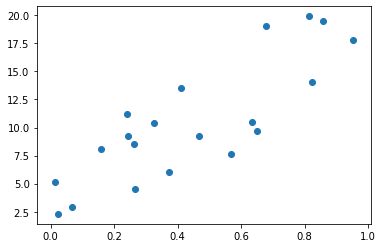

In [8]:
plt.scatter(X, y)

In [9]:
y = np.array(y)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.reshape(-1, 1), y) #reshape(-1,1)将数据变为一列
reg.score(X.reshape(-1, 1), y) #训练模型

0.6915103022742294

可以看出这个拟合的是相当差，毕竟原本图中的数据就不是线性的而是散乱的趋势。

In [11]:
reg.coef_ #返回参数 

array([15.33334875])

In [12]:
reg.intercept_ #返回截距

3.696699545981595

In [13]:
#定义一个函数返回一个线性回归模型，这里的f(x)表示是预测值
def f(x):
    return reg.coef_ * x + reg.intercept_

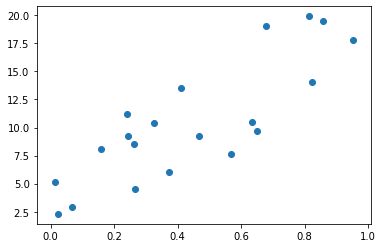

In [14]:
plt.scatter(X, y) #画出实际值

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [15]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [16]:
from scipy.spatial.distance import cosine

In [17]:
def distance(x1, x2):
    return cosine(x1, x2)

In [18]:
def predict(x, k = 5):
    most_similars = sorted(model(X, y), key = lambda xi:distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [19]:
X, y

(array([0.26382025, 0.3738004 , 0.23911814, 0.15779089, 0.95316475,
        0.24513816, 0.82326399, 0.65012542, 0.85683783, 0.56698528,
        0.81378933, 0.2643952 , 0.01273642, 0.67744126, 0.32697038,
        0.63368412, 0.46707307, 0.02342281, 0.06852314, 0.40909485]),
 array([ 8.53519134,  6.0089254 , 11.20418301,  8.11439787, 17.77240762,
         9.28485136, 14.03173747,  9.71168059, 19.48162695,  7.59760276,
        19.90477704,  4.54289568,  5.170668  , 19.07771284, 10.38140316,
        10.49136718,  9.25877909,  2.31386566,  2.91821003, 13.48187097]))

In [20]:
myself_knn = model(X, y)

In [21]:
predict(0.9)

[(0.5669852805117798, 7.59760275885785), (0.3738004028520784, 6.008925398217851), (0.23911813521320924, 11.204183011857005), (0.15779088550294018, 8.114397865739399), (0.823263990302743, 14.031737470056754)]


9.391369300945772

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

In [22]:
from collections import Counter

信息熵

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

基尼系数

$$ Gini = 1 - \sum_{i=1}^J P_i^2 $$

In [23]:
#做一个信息熵的测试，假设有如下的数据集
[1, 1, 2, 3, 3, 4, 5, 5] 
[1, 1, 1, 1, 3, 3, 3, 2]
[2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 3]


[2, 2, 2, 2, 2, 2, 2, 3]

In [24]:
from icecream import ic  # 是用作调试的包，能打印出变量名

In [25]:
def entropy(elements):
    '''群体混乱程度'''
    counter = Counter(elements) #统计elements出现的次数
    probs = [counter[c]/len(elements) for c in set(elements)] #c的次数/总次数
    ic(probs) #调试概率
    return -sum(p * np.log(p) for p in probs)

In [26]:
entropy([1, 1, 2, 3, 3, 4, 5, 5] )

ic| probs: [0.25, 0.125, 0.25, 0.125, 0.25]


1.559581156259877

In [27]:
entropy([1, 1, 1, 1, 3, 3, 3, 2])

ic| probs: [0.5, 0.125, 0.375]


0.9743147528693494

In [28]:
entropy([2, 2, 2, 2, 2, 2, 2, 2])

ic| probs: [1.0]


-0.0

In [29]:
entropy([2, 2, 2, 2, 2, 2, 2, 3])

ic| probs: [0.875, 0.125]


0.37677016125643675

从上面的测试可以看出数据越混乱，信息熵越高，数据越纯，信息熵越小。

决策树的分割

In [30]:
#用字典的形式创造数据集，包含4个特征
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [31]:
import pandas as pd

In [32]:
dataset = pd.DataFrame.from_dict(mock_data) 
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [33]:
'''现在有一个新的case
[F, -10, 2, 1]女性， 低于10k， 有两人，宠物一只，买不买？

[F, +10, 2, 0]女性， 高于10k， 有两人，没有宠物，买不买？'''


'现在有一个新的case\n[F, -10, 2, 1]女性， 低于10k， 有两人，宠物一只，买不买？\n\n[F, +10, 2, 0]女性， 高于10k， 有两人，没有宠物，买不买？'

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

In [34]:
from sklearn.cluster import KMeans

In [35]:
X1 = [random.randint(0, 100) for _ in range(100)] #0-100随机数
X2 = [random.randint(0, 100) for _ in range(100)] #0-100随机数

Text(0.5, 1.0, 'trending')

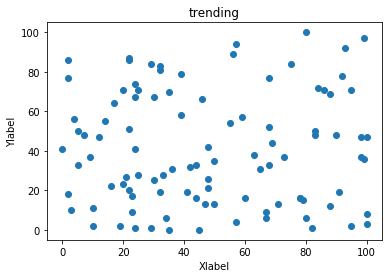

In [36]:
plt.scatter(X1, X2)
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')
plt.title('trending')

In [37]:
training_data = [[x1, x2] for x1, x2 in zip(X1, X2)] #训练集

In [38]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [39]:
cluster.fit(training_data) #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
cluster.cluster_centers_

array([[10.2       , 45.9       ],
       [76.1875    , 43.8125    ],
       [30.2       , 16.93333333],
       [25.88235294, 74.76470588],
       [79.53333333,  9.73333333],
       [81.08333333, 82.83333333]])

In [41]:
cluster.labels_

array([5, 2, 0, 1, 1, 4, 2, 0, 2, 5, 5, 5, 2, 1, 0, 2, 2, 1, 5, 2, 2, 4,
       2, 3, 2, 1, 1, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 2, 3, 0, 2, 4, 4, 4,
       3, 5, 1, 1, 4, 1, 2, 0, 5, 2, 0, 2, 4, 2, 0, 3, 3, 3, 3, 4, 3, 4,
       1, 5, 2, 4, 0, 3, 4, 3, 2, 5, 1, 1, 4, 2, 1, 2, 2, 5, 4, 2, 2, 0,
       0, 2, 4, 2, 5, 3, 1, 3, 1, 5, 3, 1])

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [42]:
from collections import defaultdict

In [43]:
centers = defaultdict(list)
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)

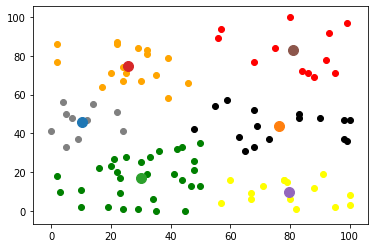

In [44]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 
  models往小了说是机器学习中的模型，往大了说可以指科学。科学只能是再做特定时间和空间下显示正确或者说预测正确，然而跳出这个时间空间就有可能是被证明错误的。比如人类历史上的日心说，地心说之间的矛盾。机器学习的模型可能被证明在当前是有用的，但是在未来某一天被证明是错误的。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

    欠拟合：模型学习不到位，在预测准确性上有很大欠缺。比如把猫和狗都当成了猫
    过拟合：模型的泛化能力差，学习过度。比如金毛和哈士奇都是狗，模型用金毛的
          特征来训练，结果无法判断出哈士奇是狗。
    欠拟合产生原因：模型学习不到位，可能是样本特征数量太少或是数据量不够大导致的。
    过拟合产生原因：1)样本的特征数量太多，而训练样本数目太少。
              2)原始数据的噪声大
              3)模型复杂程度过高，参数太多。 

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

    Ans: precision：查准率/精度 = TP/(TP+FP)
                    实际预测正确/所有我预测为正确的
    recall: 查全率/召回率 = TP/(TP+FN)
                    实际预测正确/所有实际正确的
    AUC : 为ROC曲线与recall，precision形成的面积，AUC越大越好
   
    F1: 调和平均 F1 = 2*PR/P+R, 在F1中beta为1
    F2: F1的变形 F2 = (1+beta^2)*PR/(beta^2)(P+R)， 在F2中beta大于1


<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

    传统的编程为：程序员输入指令，然后电脑去执行，所有的思维来自于程序员。
    机器学习为：程序员训练模型，程序员输入指定到模型，由模型输出结果，中间由电脑思考。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

      机器学习的最终目的是模型预测的准确性和产品落地化。那么合适的模型评价标准就在
      调参过程中起到重要的作用。如果评价标准不合适，那么模型的表现很难有一个参照物，
      那么调参的方向也成了问题。可以说合适的评价标准指明了优化方向。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [47]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

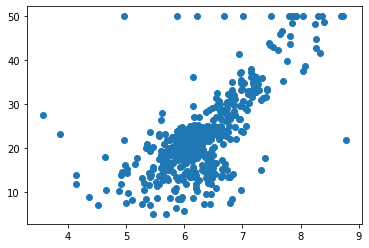

In [48]:
plt.scatter(X_rm,y)

#### assume that the target function is a linear function
$$ y = k * rm + b $$

In [52]:
def price(rm, k, b):
    return k * rm + b


#### define mean absolute loss（改为绝对值)

$$ (previous) MSE:loss = \frac{1}{n} \sum^{n}_{i=1}{(y_i - \hat y_i)^2}$$ 
$$ (current) MAE:loss = \frac{1}{n} \sum^{n}_{i=1}{|y_i - \hat y_i|} = \frac{1}{n} \sum^{n}_{i=1}{|y_i - (kx_i + b_i)|}$$ 

偏导数
$$ \frac{\partial loss}{\partial k} = - \frac{1}{n}\sum^{n}_{i=1}|x_i|$$
$$ \frac{\partial loss}{\partial b} = -1$$

In [57]:
def partial_derivative_k(x): 
    gradient = -np.mean(np.abs(list(x)))
    return gradient

def partial_derivative_b():
    return -1

def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [58]:
partial_derivative_k(X_rm) #斜率

-6.284634387351779

In [61]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm) #带入新的斜率
    b_gradient = partial_derivative_b() #带入新的截距
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 240687.04368303253, parameters k is -88.04105178572186 and b is 90.04651181362559
Iteration 1, the loss is 240647.0978659342, parameters k is -88.0347671513345 and b is 90.04751181362559
Iteration 2, the loss is 240607.15536771, parameters k is -88.02848251694715 and b is 90.0485118136256
Iteration 3, the loss is 240567.21618835884, parameters k is -88.0221978825598 and b is 90.0495118136256
Iteration 4, the loss is 240527.28032788183, parameters k is -88.01591324817244 and b is 90.0505118136256
Iteration 5, the loss is 240487.34778627782, parameters k is -88.00962861378508 and b is 90.05151181362561
Iteration 6, the loss is 240447.41856354766, parameters k is -88.00334397939773 and b is 90.05251181362561
Iteration 7, the loss is 240407.49265969143, parameters k is -87.99705934501037 and b is 90.05351181362562
Iteration 8, the loss is 240367.5700747085, parameters k is -87.99077471062301 and b is 90.05451181362562
Iteration 9, the loss is 240327.6508085991, par

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)